# Spectral Table Resolution Testing

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from scipy.interpolate import interp1d

from synthesizAR.atomic.idl import compute_spectral_table

from mocksipipeline.detector.response import SpectrogramChannel
from mocksipipeline.physics.spectral import SpectralModel

from synthesizAR import log
log.setLevel('DEBUG')

In [21]:
spec_channel = SpectrogramChannel(4)

In [22]:
spec_channel.spectral_resolution

<Quantity 0.0718 Angstrom / pix>

In [5]:
spec_tab = SpectralModel().spectral_table

In [6]:
spec_tab

NDCube
------
Dimensions: [  60. 9090.] pix
Physical Types of Axes: [('phys.temperature', 'phys.density'), ('em.wl',)]
Unit: cm3 ph / (Angstrom s sr)
Data Type: float64

<WCSAxesSubplot:>

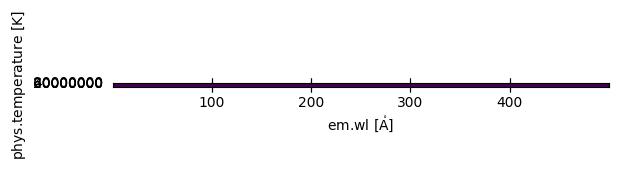

In [8]:
spec_tab.plot()

Trying to understand whether changing wavelength spacing makes a difference when computing spectra.
If the quantities are computed per Angstrom, then they should not...

In [54]:
spec_table_res1 = compute_spectral_table(
    temperature=[1]*u.MK,
    density=[1e9]*u.cm**(-3),
    wave_min=18*u.Angstrom,
    wave_max=25*u.Angstrom,
    delta_wave=10*u.milliangstrom,
    ioneq_filename='chianti.ioneq',
    abundance_filename='sun_coronal_1992_feldman_ext.abund',
    include_continuum=True,
    use_lookup_table=True,
    include_all_lines=True,
)

DEBUG: Computing spectra for (T,n) = (1.0 MK, 1000000000.0 1 / cm3) [synthesizAR.atomic.idl]
DEBUG: {'wave_min': <Quantity 18. Angstrom>, 'wave_max': <Quantity 25. Angstrom>, 'delta_wave': <Quantity 10. mAngstrom>, 'emission_measure': <Quantity 1. 1 / cm5>, 'ioneq_file': 'chianti.ioneq', 'abundance_file': 'sun_coronal_1992_feldman_ext.abund', 'ion_list': None, 'include_continuum': True, 'include_all_lines': True, 'use_lookup_table': True, 'photons': True, 'temperature': <Quantity 1. MK>, 'density': <Quantity 1.e+09 1 / cm3>} [synthesizAR.atomic.idl]
DEBUG: IDL 8.9.0 (darwin x86_64 m64).
(c) 2023, L3Harris Geospatial Solutions, Inc.

Licensed for use by: ASA - Goddard Space Flight Center - Code 600, Science &
 Exploration Directorate, Greenbelt - Greason
License: 234362
% Program caused arithmetic error: Floating overflow
% Compiled module: USE_CHIANTI.
% Compiled module: DIR_EXIST.
% DEVICELIB: Added system variable !BCOLOR
% DEVICELIB: Added system variable !ASPECT
% Compiled module: 

In [55]:
spec_table_res2 = compute_spectral_table(
    temperature=[1]*u.MK,
    density=[1e9]*u.cm**(-3),
    wave_min=18*u.Angstrom,
    wave_max=25*u.Angstrom,
    delta_wave=5*u.milliangstrom,
    ioneq_filename='chianti.ioneq',
    abundance_filename='sun_coronal_1992_feldman_ext.abund',
    include_continuum=True,
    use_lookup_table=True,
    include_all_lines=True,
)

DEBUG: Computing spectra for (T,n) = (1.0 MK, 1000000000.0 1 / cm3) [synthesizAR.atomic.idl]
DEBUG: {'wave_min': <Quantity 18. Angstrom>, 'wave_max': <Quantity 25. Angstrom>, 'delta_wave': <Quantity 5. mAngstrom>, 'emission_measure': <Quantity 1. 1 / cm5>, 'ioneq_file': 'chianti.ioneq', 'abundance_file': 'sun_coronal_1992_feldman_ext.abund', 'ion_list': None, 'include_continuum': True, 'include_all_lines': True, 'use_lookup_table': True, 'photons': True, 'temperature': <Quantity 1. MK>, 'density': <Quantity 1.e+09 1 / cm3>} [synthesizAR.atomic.idl]
DEBUG: IDL 8.9.0 (darwin x86_64 m64).
(c) 2023, L3Harris Geospatial Solutions, Inc.

Licensed for use by: ASA - Goddard Space Flight Center - Code 600, Science &
 Exploration Directorate, Greenbelt - Greason
License: 234362
% Program caused arithmetic error: Floating overflow
% Compiled module: USE_CHIANTI.
% Compiled module: DIR_EXIST.
% DEVICELIB: Added system variable !BCOLOR
% DEVICELIB: Added system variable !ASPECT
% Compiled module: H

In [71]:
spec_table_res3 = compute_spectral_table(
    temperature=[1]*u.MK,
    density=[1e9]*u.cm**(-3),
    wave_min=18*u.Angstrom,
    wave_max=25*u.Angstrom,
    delta_wave=2.5*u.milliangstrom,
    ioneq_filename='chianti.ioneq',
    abundance_filename='sun_coronal_1992_feldman_ext.abund',
    include_continuum=True,
    use_lookup_table=True,
    include_all_lines=True,
)

DEBUG: Computing spectra for (T,n) = (1.0 MK, 1000000000.0 1 / cm3) [synthesizAR.atomic.idl]
DEBUG: {'wave_min': <Quantity 18. Angstrom>, 'wave_max': <Quantity 25. Angstrom>, 'delta_wave': <Quantity 2.5 mAngstrom>, 'emission_measure': <Quantity 1. 1 / cm5>, 'ioneq_file': 'chianti.ioneq', 'abundance_file': 'sun_coronal_1992_feldman_ext.abund', 'ion_list': None, 'include_continuum': True, 'include_all_lines': True, 'use_lookup_table': True, 'photons': True, 'temperature': <Quantity 1. MK>, 'density': <Quantity 1.e+09 1 / cm3>} [synthesizAR.atomic.idl]
DEBUG: IDL 8.9.0 (darwin x86_64 m64).
(c) 2023, L3Harris Geospatial Solutions, Inc.

Licensed for use by: ASA - Goddard Space Flight Center - Code 600, Science &
 Exploration Directorate, Greenbelt - Greason
License: 234362
% Program caused arithmetic error: Floating overflow
% Compiled module: USE_CHIANTI.
% Compiled module: DIR_EXIST.
% DEVICELIB: Added system variable !BCOLOR
% DEVICELIB: Added system variable !ASPECT
% Compiled module: 

In [73]:
spec_table_res1.unit

Unit("cm3 ph / (Angstrom s sr)")

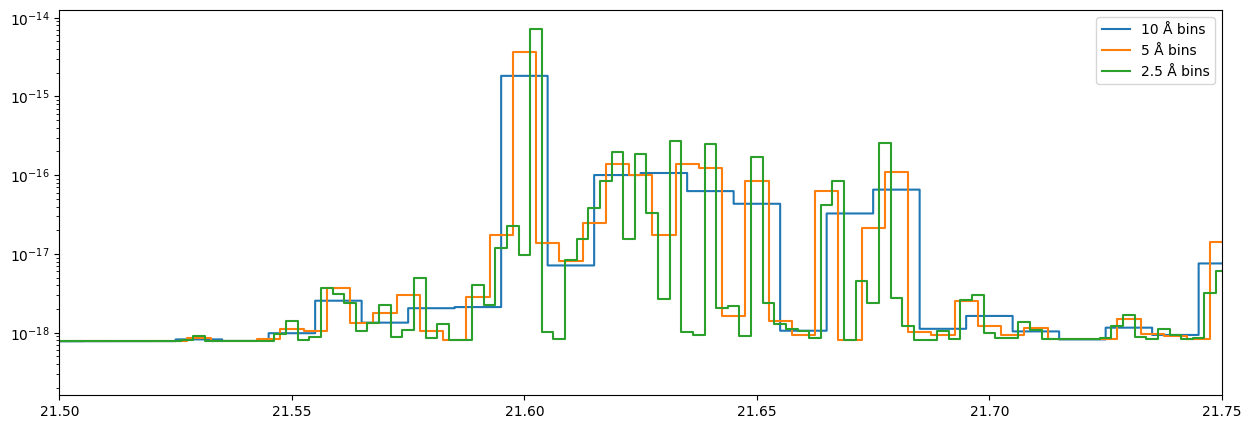

In [72]:
plt.figure(figsize=(15,5))
#l1, = plt.plot(spec_table_res1.axis_world_coords(1)[0],spec_table_res1[0].data, ls=':')
plt.step(spec_table_res1.axis_world_coords(1)[0],spec_table_res1[0].data, where='mid', ls='-', color='C0', label='10 Å bins')
#l2, = plt.plot(spec_table_res2.axis_world_coords(1)[0],spec_table_res2[0].data, ls=':')
plt.step(spec_table_res2.axis_world_coords(1)[0],spec_table_res2[0].data, where='mid', ls='-', color='C1', label='5 Å bins')
plt.step(spec_table_res3.axis_world_coords(1)[0],spec_table_res3[0].data, where='mid', ls='-', color='C2', label='2.5 Å bins')
plt.xlim(21.5,21.75)
plt.yscale('log')
#plt.ylim(7e-19,1e-14)
plt.legend()

In [86]:
f_interp = interp1d(spec_table_res3.axis_world_coords(1)[0].to_value('AA'),
                    spec_table_res3[0].data,kind='next')

In [109]:
st3_rebin = (spec_table_res3[0,:-1]).rebin((2,))

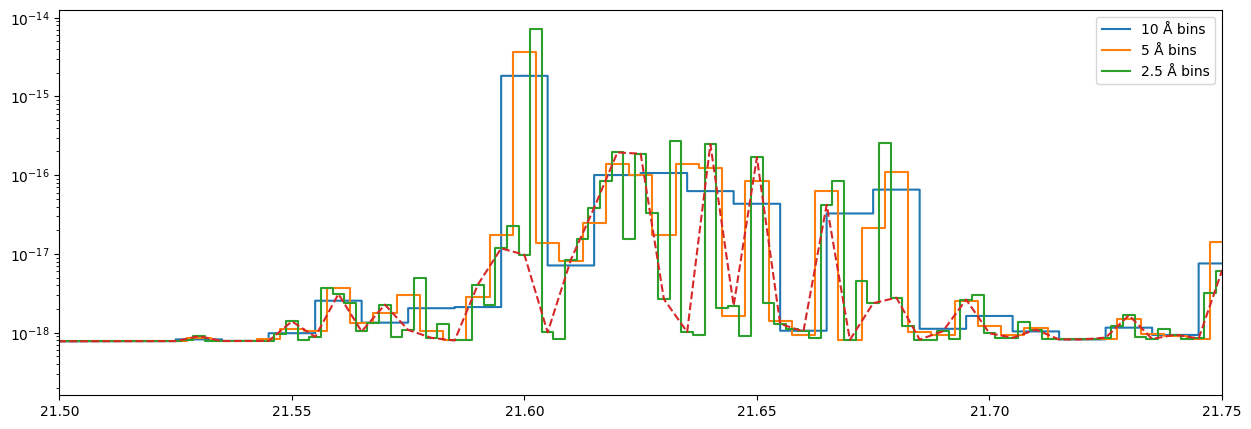

In [113]:
plt.figure(figsize=(15,5))
#l1, = plt.plot(spec_table_res1.axis_world_coords(1)[0],spec_table_res1[0].data, ls=':')
plt.step(spec_table_res1.axis_world_coords(1)[0],spec_table_res1[0].data, where='mid', ls='-', color='C0', label='10 Å bins')
plt.step(spec_table_res2.axis_world_coords(1)[0],spec_table_res2[0].data, where='mid', ls='-', color='C1', label='5 Å bins')
plt.step(spec_table_res3.axis_world_coords(1)[0],spec_table_res3[0].data, where='mid', ls='-', color='C2', label='2.5 Å bins')
plt.plot(spec_table_res2.axis_world_coords(1)[0],
         f_interp(spec_table_res2.axis_world_coords(1)[0].to_value('AA'),), color='C3', ls='--')
#plt.step(st3_rebin.axis_world_coords(0)[0],st3_rebin.data, where='mid', ls='-', color='C3', label='Rebin 2.5->10')

plt.xlim(21.5,21.75)
plt.yscale('log')
#plt.ylim(7e-19,1e-14)
plt.legend()